## MIMIC-III Dataset

We used MIMIC-III data for this project as it is an open source dataset and contains multiple tables which can be combined to prepare use cases. Data can be accesed on link provided below and in order to access data, few certifications are required which can be obtained by completing trainings on website. 
Medical Information Mart for Intensive Care Unit (MIMIC) III: Open source dataset developed by the MIT Lab comprising de-identified health data is a comprehensive clinical dataset of 40,000+ patients admitted in ICU. Few salient features of this databases include:
- <b> 26 tables:</b> Comprehensive clinical dataset with different tables
- <b> 40,000+ patients:</b> Data associated with multiple admissions of patients
- <b> 65,000+ ICU admissions:</b> Admitted in ICUs at Beth Israel Deaconess Medical Centre, Boston, from 2001 to 2012
- <b> PII data:</b> Includes patient sensitive details like demographics, diagnosis, laboratory tests, medications etc.
- <b> Use cases:</b> Can be used for multiple analysis like clinical data (prescriptions), claims data (payer), members data (patient)

For this project, we focus on using specific tables from this database and create 2 different use cases which can be found in following section.

Source: https://mimic.physionet.org/gettingstarted/overview/

## Use Cases

### Use Case 1: Length of Stay - Vibhav to complete this

Predicting the length of stay in ICU using 4 out of 26 tables


Use case: Out of variety of possible use cases from MIMIC III dataset we focus on single use case to predict the number of days a patient stays in the hospital to further generate synthetic data

6984 ICD-9 codes: The diagnosis dataset contains unique International Classification of Disease (ICD-9) codes

17 primary categories: We consider categories of conditions for the predictive modeling


### Use Case 2: Mortality Prediction

Another use case which we implemented using MIMIC-III dataset is for mortality prediction. This use case is inspired by Kaggle kernel (reference below) where one can predict mortality just by the number of interactions betweeen patient and hospital as predictors through count of lab tests, prescriptions, and procedures. It can be used to evaluate privacy risk with the help of PII columns like GENDER, ETHNICITY, MARITAL_STATUS and also serves as classification problem where we have to predict if patient will expire or not for a single hospital admission.

Reference: https://www.kaggle.com/drscarlat/predict-hospital-mortality-mimic3

#### Tables Used
1. Patients - SUBJECT_ID, GENDER
2. Admissions - SUBJECT_ID, HADM_ID, HOSPITAL_EXPIRE_FLAG, MARITAL_STATUS, ETHNICITY, ADMISSION_TYPE
3. CallOut - SUBJECT_ID, HADM_ID, NUMCALLOUT (count of rows)
4. CPTEvents - SUBJECT_ID, HADM_ID, NUMCPTEVENTS (count of rows)
5. Diagnosis_ICD - SUBJECT_ID, HADM_ID, NUMDIAGNOSIS (count of rows)
6. Inputevents_CV - SUBJECT_ID, HADM_ID, NUMINPUTEVENTS (count of rows)
7. Labevents - SUBJECT_ID, HADM_ID, NUMLABEVENTS (count of rows)
8. Noteevents - SUBJECT_ID, HADM_ID,  NUMNOTEVENTS (count of rows)
9. Outputevents - SUBJECT_ID, HADM_ID, NUMOUTEVENTS (count of rows)
10. Prescriptions - SUBJECT_ID, HADM_ID, NUMRX (count of rows)
11. Procedureevents_mv - SUBJECT_ID, HADM_ID, NUMPROCEVENTS (count of rows)
12. microbilogyevents - SUBJECT_ID, HADM_ID, NUMMICROLABEVENTS (count of rows)
13. Procedures_icd - SUBJECT_ID, HADM_ID, NUMPROC (count of rows)
14. Transfers - SUBJECT_ID, HADM_ID, NUMTRANSFERS (count of rows)



#### Final data includes
- <b> Level of data:</b> Each instance in the final data set is one admission and is defined by 'SUBJECT_ID', 'HADM_ID'
- <b> Target Variables:</b> 'HOSPITAL_EXPIRY_FLAG' is used as target variable
- <b> Predictor variables:</b> 'ADMISSION_TYPE', 'MARITAL_STATUS', 'ETHNICITY', 'HOSPITAL_EXPIRE_FLAG', 'GENDER', 'NUMCALLOUT', 'NUMCPTEVENTS', 'NUMDIAGNOSIS', 'NUMOUTEVENTS', 'NUMRX', 'NUMPROCEVENTS', 'NUMMICROLABEVENTS', 'NUMPROC', 'NUMTRANSFERS', 'NUMINPUTEVENTS', 'NUMLABEVENTS', 'NUMNOTEVENTS'

#### Methodology
1. <b> Load csv files:</b> Read the comma seperated files donwloaded from link (https://mimic.physionet.org/gettingstarted/overview/)
2. <b> Roll up tables:</b> We need count of various events or iteractions between patients and hospital. In order to do this, group by or aggregate the tables at 'SUBJECT_ID' and 'HADM_ID' level and take count of number of rows for each. This will give total count fo events related to single hospital admission.
3. <b> Merge tables: </b> Use 'SUBJECT_ID' and 'HADM_ID' as composite key to merge all tables together and create final analytical data set.

#### Code
1. Import required libraries and read csv files
2. Function to roll up tables
3. Merge all tables
4. Exploratory Analysis

#### 1. Import required libraries and read csv files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
patients = pd.read_csv("data/patients.csv")
admissions = pd.read_csv("data/admissions.csv")
callout = pd.read_csv("data/callout.csv")
cptevents = pd.read_csv("data/cptevents.csv")
diagnosis = pd.read_csv("data/diagnoses_icd.csv")
outputevents = pd.read_csv("data/outputevents.csv")
rx = pd.read_csv("data/prescriptions.csv")
procevents = pd.read_csv("data/procedureevents_mv.csv")
microlabevents = pd.read_csv("data/microbiologyevents.csv")
proc = pd.read_csv("data/procedures_icd.csv")
transfers = pd.read_csv("data/transfers.csv")
inputevents = pd.read_csv("data/inputevents_cv.csv")
labevents = pd.read_csv("data/labevents.csv")
noteevents = pd.read_csv("data/noteevents.csv")

#### 2. Function to roll up tables

In [3]:
def rollup_sub_adm(df,col):
    df=df.groupby(['SUBJECT_ID','HADM_ID']).agg({'ROW_ID':'count'})
    df.reset_index(inplace=True)
    df.columns=['SUBJECT_ID','HADM_ID',col]
    print(col,":",df.shape)
    return df

In [4]:
callout=rollup_sub_adm(callout,'NUMCALLOUT')
cptevents=rollup_sub_adm(cptevents,'NUMCPTEVENTS')
diagnosis=rollup_sub_adm(diagnosis,'NUMDIAGNOSIS')
outputevents=rollup_sub_adm(outputevents,'NUMOUTEVENTS')
rx=rollup_sub_adm(rx,'NUMRX')
procevents=rollup_sub_adm(procevents,'NUMPROCEVENTS')
microlabevents=rollup_sub_adm(microlabevents,'NUMMICROLABEVENTS')
proc=rollup_sub_adm(proc,'NUMPROC')
transfers=rollup_sub_adm(transfers,'NUMTRANSFERS')
inputevents=rollup_sub_adm(inputevents,'NUMINPUTEVENTS')
labevents=rollup_sub_adm(labevents,'NUMLABEVENTS')
noteevents=rollup_sub_adm(noteevents,'NUMNOTEVENTS')

NUMCALLOUT : (28732, 3)
NUMCPTEVENTS : (44148, 3)
NUMDIAGNOSIS : (58976, 3)
NUMOUTEVENTS : (52008, 3)
NUMRX : (50216, 3)
NUMPROCEVENTS : (21894, 3)
NUMMICROLABEVENTS : (48740, 3)
NUMPROC : (52243, 3)
NUMTRANSFERS : (58976, 3)
NUMINPUTEVENTS : (31970, 3)
NUMLABEVENTS : (58151, 3)
NUMNOTEVENTS : (58361, 3)


#### 3. Merge all tables

In [5]:
mortality=admissions[['SUBJECT_ID','HADM_ID','ADMISSION_TYPE','MARITAL_STATUS','ETHNICITY','HOSPITAL_EXPIRE_FLAG']]
mortality.loc[pd.isnull(mortality['MARITAL_STATUS']),'MARITAL_STATUS'] ='UNKNOWN (DEFAULT)'
mortality = mortality.merge(patients[['SUBJECT_ID','GENDER']],how='left',on='SUBJECT_ID')
mortality = mortality.merge(callout,how='left',on=['SUBJECT_ID','HADM_ID'])
mortality = mortality.merge(cptevents,how='left',on=['SUBJECT_ID','HADM_ID'])
mortality = mortality.merge(diagnosis,how='left',on=['SUBJECT_ID','HADM_ID'])
mortality = mortality.merge(outputevents,how='left',on=['SUBJECT_ID','HADM_ID'])
mortality = mortality.merge(rx,how='left',on=['SUBJECT_ID','HADM_ID'])
mortality = mortality.merge(procevents,how='left',on=['SUBJECT_ID','HADM_ID'])
mortality = mortality.merge(microlabevents,how='left',on=['SUBJECT_ID','HADM_ID'])
mortality = mortality.merge(proc,how='left',on=['SUBJECT_ID','HADM_ID'])
mortality = mortality.merge(transfers,how='left',on=['SUBJECT_ID','HADM_ID'])
mortality = mortality.merge(inputevents,how='left',on=['SUBJECT_ID','HADM_ID'])
mortality = mortality.merge(labevents,how='left',on=['SUBJECT_ID','HADM_ID'])
mortality = mortality.merge(noteevents,how='left',on=['SUBJECT_ID','HADM_ID'])
mortality = mortality.fillna(0)
mortality.head()

,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,MARITAL_STATUS,ETHNICITY,HOSPITAL_EXPIRE_FLAG,GENDER,NUMCALLOUT,NUMCPTEVENTS,NUMDIAGNOSIS,NUMOUTEVENTS,NUMRX,NUMPROCEVENTS,NUMMICROLABEVENTS,NUMPROC,NUMTRANSFERS,NUMINPUTEVENTS,NUMLABEVENTS,NUMNOTEVENTS
0,22,165315,EMERGENCY,MARRIED,WHITE,0,F,0.0,0.0,7,7.0,0.0,0.0,1.0,3.0,2,6.0,91.0,10.0
1,23,152223,ELECTIVE,MARRIED,WHITE,0,M,0.0,0.0,8,62.0,69.0,0.0,1.0,7.0,4,180.0,208.0,12.0
2,23,124321,EMERGENCY,MARRIED,WHITE,0,M,1.0,6.0,10,29.0,69.0,4.0,1.0,1.0,5,0.0,221.0,17.0
3,24,161859,EMERGENCY,SINGLE,WHITE,0,M,0.0,4.0,4,2.0,26.0,0.0,0.0,6.0,3,50.0,99.0,5.0
4,25,129635,EMERGENCY,MARRIED,WHITE,0,M,0.0,4.0,4,59.0,67.0,0.0,2.0,9.0,4,483.0,315.0,20.0


In [6]:
#Exporing data
mortality.to_csv('mortality_full_data.csv',index=False)

#### 4. Exploratory Analysis

In [7]:
mortality.shape

(58976, 19)

In [8]:
mortality.columns

Index(['SUBJECT_ID', 'HADM_ID', 'ADMISSION_TYPE', 'MARITAL_STATUS',
       'ETHNICITY', 'HOSPITAL_EXPIRE_FLAG', 'GENDER', 'NUMCALLOUT',
       'NUMCPTEVENTS', 'NUMDIAGNOSIS', 'NUMOUTEVENTS', 'NUMRX',
       'NUMPROCEVENTS', 'NUMMICROLABEVENTS', 'NUMPROC', 'NUMTRANSFERS',
       'NUMINPUTEVENTS', 'NUMLABEVENTS', 'NUMNOTEVENTS'],
      dtype='object')

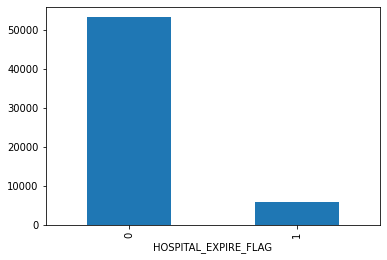

In [9]:
mortality.groupby('HOSPITAL_EXPIRE_FLAG').size().plot.bar()
plt.show()

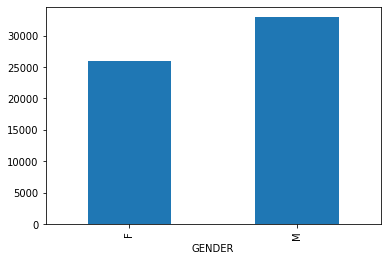

In [10]:
mortality.groupby('GENDER').size().plot.bar()
plt.show()

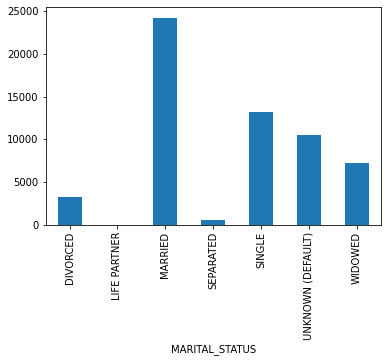

In [11]:
mortality.groupby('MARITAL_STATUS').size().plot.bar()
plt.show()

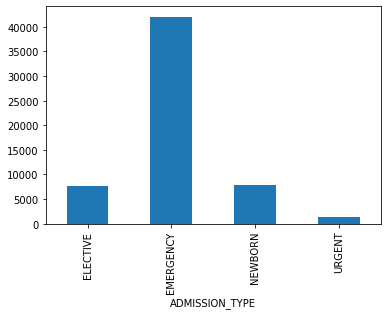

In [12]:
mortality.groupby('ADMISSION_TYPE').size().plot.bar()
plt.show()

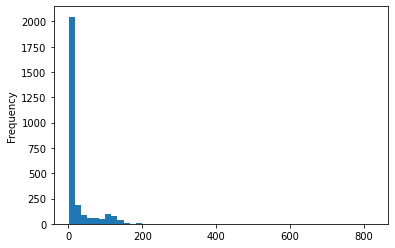

In [13]:
mortality.groupby('NUMLABEVENTS').size().plot.hist(bins=50)
plt.show()

In [14]:
mortality.dtypes

SUBJECT_ID                int64
HADM_ID                   int64
ADMISSION_TYPE           object
MARITAL_STATUS           object
ETHNICITY                object
HOSPITAL_EXPIRE_FLAG      int64
GENDER                   object
NUMCALLOUT              float64
NUMCPTEVENTS            float64
NUMDIAGNOSIS              int64
NUMOUTEVENTS            float64
NUMRX                   float64
NUMPROCEVENTS           float64
NUMMICROLABEVENTS       float64
NUMPROC                 float64
NUMTRANSFERS              int64
NUMINPUTEVENTS          float64
NUMLABEVENTS            float64
NUMNOTEVENTS            float64
dtype: object